# Import the necessary packages and define the path to the phaseb_data directory as well as the new directory you would like to save the altered files to. 

In [1]:
from astropy.io import fits
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'image.origin': 'lower'})
import os
from pathlib import Path
import misc

# spcdir_old = Path('C:/Users/Kian/Desktop/phasec_data/spc_20200610_wfov'); print(spcdir_old)
# spcdir = Path('C:/Users/Kian/Desktop/roman-cgi-phasec-data/spc-wide'); print(spcdir)
spcdir_old = Path('/Users/kianmilani/Desktop/phasec_data/spc_20200610_wfov'); print(spcdir_old)
spcdir = Path('/Users/kianmilani/Desktop/roman-cgi-phasec-data/hlc'); print(spcdir)

pupil_diam = 2.363114*u.m
pupil_diam_pix = 1000*u.pixel

/Users/kianmilani/Desktop/phasec_data/spc_20200610_wfov
/Users/kianmilani/Desktop/roman-cgi-phasec-data/hlc


# Add pupil scales to the pupil files.

/Users/kianmilani/Desktop/roman-cgi-phasec-data/hlc/pupil_SPC-20200610_1000.fits
0.002363114 m / pix (1001, 1001)


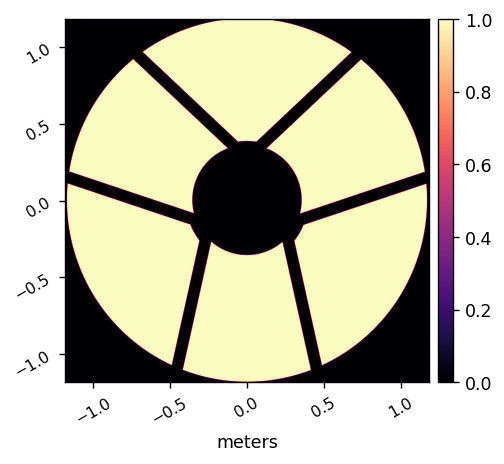

In [2]:
pupil_fnames = ['pupil_SPC-20200610_1000.fits']

for fname in pupil_fnames:
    spc825pup = fits.open(spcdir_old/fname)
    spc825pup_data = spc825pup[0].data
    spc825pup.close()
    
    hdr = fits.Header()
    hdr['PUPLSCAL'] = pupil_diam.value/pupil_diam_pix.value
    hdr['PIXELSCL'] = pupil_diam.value/pupil_diam_pix.value
    spc825pup_new = fits.PrimaryHDU(data=spc825pup_data, header=hdr)
    spc825pup_new.writeto(spcdir/fname, overwrite=True)
    print(spcdir/fname)
    print(pupil_diam/pupil_diam_pix, spc825pup_data.shape)
    misc.myimshow(spc825pup_data, pxscl=pupil_diam/pupil_diam_pix)

# Add pupil scales to the pupil mask files.

/Users/kianmilani/Desktop/roman-cgi-phasec-data/hlc/SPM_SPC-20200610_1000_rounded9_gray.fits
(1001, 1001)


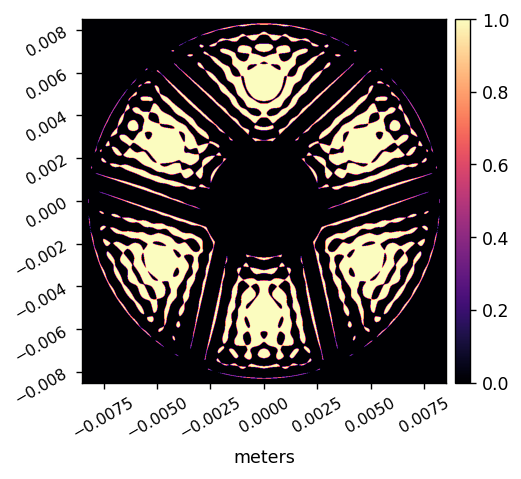

/Users/kianmilani/Desktop/roman-cgi-phasec-data/hlc/SPM_SPC-20200610_1000_rounded9_gray_rotated.fits
(1001, 1001)


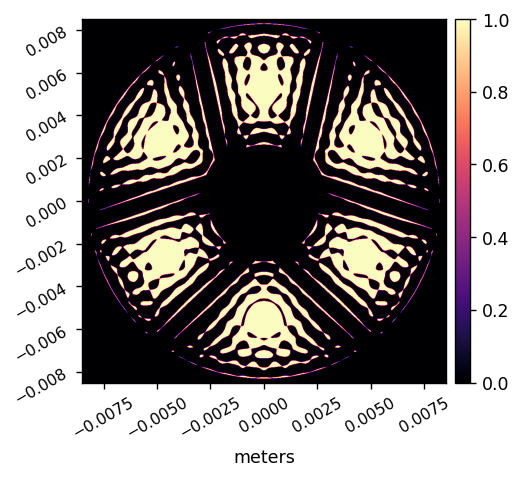

In [3]:
spm_fnames = ['SPM_SPC-20200610_1000_rounded9_gray.fits','SPM_SPC-20200610_1000_rounded9_gray_rotated.fits']
spm_sampling = 1.7000139742947902e-05*u.m/u.pixel

for fname in spm_fnames:
    spc825spm = fits.open(spcdir_old/fname)
    spc825spm_data = spc825spm[0].data
    spc825spm.close()
    
    hdr = fits.Header()
    hdr['PIXELSCL'] = spm_sampling.value
    spc825spm_new = fits.PrimaryHDU(data=spc825spm_data, header=hdr)
    spc825spm_new.writeto(spcdir/fname, overwrite=True)
    print(spcdir/fname)
    print(spc825spm_data.shape)
    misc.myimshow(spc825spm_data, pxscl=spm_sampling)

# Add pixel scales to the FPM files.

8.25e-07 0.16666666666666666 0.012001710818426768 arcsec / pix
/Users/kianmilani/Desktop/roman-cgi-phasec-data/hlc/FPM_SPC-20200610_res6.fits


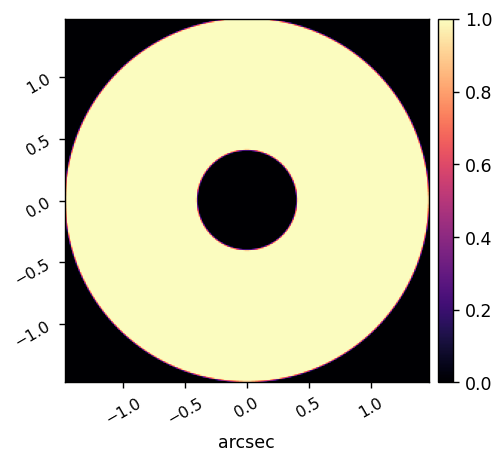

8.25e-07 0.1 0.007201026491056061 arcsec / pix
/Users/kianmilani/Desktop/roman-cgi-phasec-data/hlc/FPM_SPC-20200610_0.1_lamc_div_D.fits


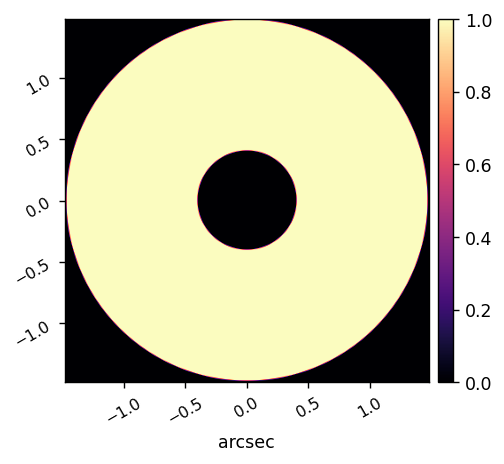

In [4]:
fpm_fnames = ['FPM_SPC-20200610_res6.fits', 'FPM_SPC-20200610_0.1_lamc_div_D.fits']

for i,fname in enumerate(fpm_fnames):
    spc825fpm = fits.open(spcdir_old/fname)
    spc825fpm_data = spc825fpm[0].data
    spc825fpm.close()
    if i==0: 
        fpm_pxscl_lamD = 1/6
    elif i==1:
        fpm_pxscl_lamD = 0.1
    fpm_lambda_m = 825e-9
    fpm_pxscl_as = (fpm_pxscl_lamD*(fpm_lambda_m/pupil_diam.value)*u.radian/u.pix).to(u.arcsec/u.pix)
    print(fpm_lambda_m, fpm_pxscl_lamD, fpm_pxscl_as)
    
    print(spcdir/fname)
    hdr = fits.Header()
    hdr['PIXELSCL'] = fpm_pxscl_as.value
    hdr['PIXSCLLD'] = fpm_pxscl_lamD
    hdr['WAVELENC'] = fpm_lambda_m
    hdr['PUPLDIAM'] = pupil_diam.value
    spc825fpm_new = fits.PrimaryHDU(data=spc825fpm_data, header=hdr)
    spc825fpm_new.writeto(str(spcdir/fname), overwrite=True)
    
    misc.myimshow(spc825fpm_data, pxscl=fpm_pxscl_as)
    
    
    
    

# Add pupil scales to the lyot stop files.

/Users/kianmilani/Desktop/roman-cgi-phasec-data/hlc/LS_SPC-20200610_500.fits
(505, 505)


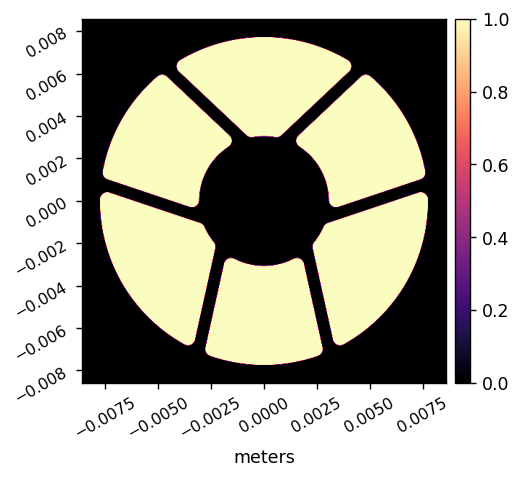

/Users/kianmilani/Desktop/roman-cgi-phasec-data/hlc/LS_SPC-20200610_1000.fits
(1001, 1001)


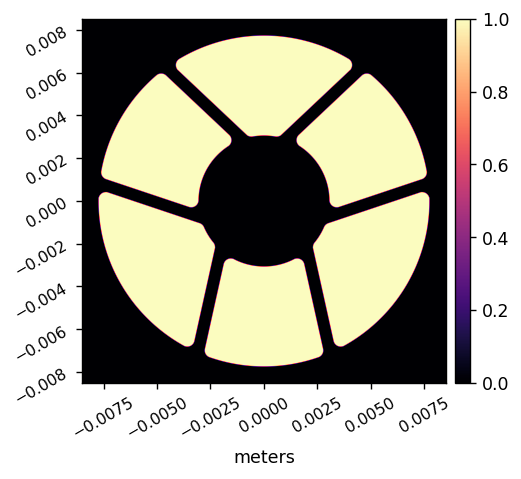

In [5]:
ls_fnames = ['LS_SPC-20200610_500.fits','LS_SPC-20200610_1000.fits']
ls_samplings = [1.6998849063360116e-05*2*u.m/u.pixel, 1.6998849063360116e-05*u.m/u.pixel] 

for i,fname in enumerate(ls_fnames):
    spc730ls = fits.open(spcdir_old/fname)
    spc730ls_data = spc730ls[0].data
    spc730ls.close()
    
    hdr = fits.Header()
    hdr['PIXELSCL'] = ls_samplings[i].value
    spc730ls_new = fits.PrimaryHDU(data=spc730ls_data, header=hdr)
    spc730ls_new.writeto(spcdir/fname, overwrite=True)
    print(spcdir/fname)
    print(spc730ls_data.shape)
    misc.myimshow(spc730ls_data, pxscl=ls_samplings[i])